In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def variance(x):
    n = len(x)
    x_mean = np.mean(x, axis=0)
    var = np.sum((x - x_mean)**2) / n 
    return var

def std(x):
    return np.sqrt(variance(x))\

def sum_squared_error (y, line):
    n = len(y)
    error = np.sum( (y - line[:n])**2)
    return error

def r2(y,line):
    n = len(y)
    mean_var = variance(y)
    fit_var = sum_squared_error(y,line[:n]) / n 
    #r2 = mean_var - fit_var / mean_var
    r2 = 1 - fit_var / mean_var
    return r2

def f_score(y, line):
    n = len(y)
    p = 2
    mean_var = np.sum((y-np.mean(y))**2) # 
    fit_var = sum_squared_error(y,line[:n])
    explained_var = (mean_var - fit_var) / (p-1)
    unexplained_var = fit_var / (n-2)
    f = explained_var / unexplained_var
    return f

0.6590909090909092 5.800000000000001


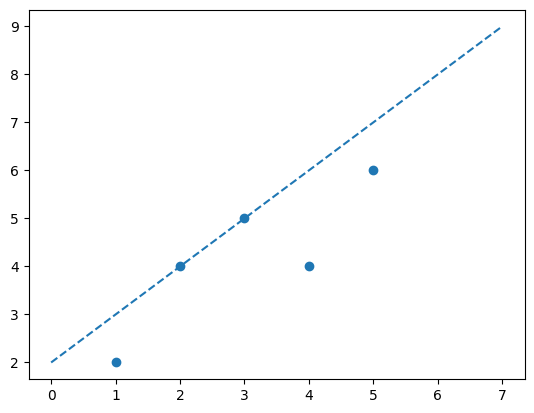

In [3]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 6])
line = np.array([i for i in range(8)]) + 2
x_axis = np.array([i for i in range(len(line))])

plt.plot(x_axis, line, linestyle='--')
plt.scatter(x,y)

print(r2(y,line), f_score(y,line))

In [4]:
def visulize_f_distribution(x,y):
    f_list = []
    for _ in range(100):
        n = len(y)
        random_data = np.random.randn(n)
        # fit regression
        coeffs = np.polyfit(x, random_data, 1)
        line = np.polyval(coeffs, x)
        f = f_score(random_data, line[:n])
        f_list.append(f)
    plt.hist(f_list)

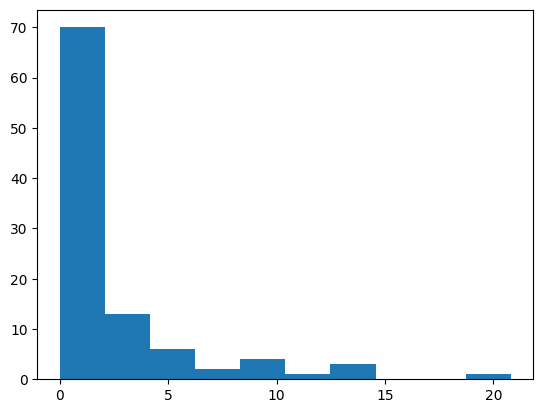

In [5]:
visulize_f_distribution(x,y)

In [ ]:
ggftgfff